##Housing Price Prediction

Qs:Which feature is impact to price the most?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df =  pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


1. EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# missing value
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


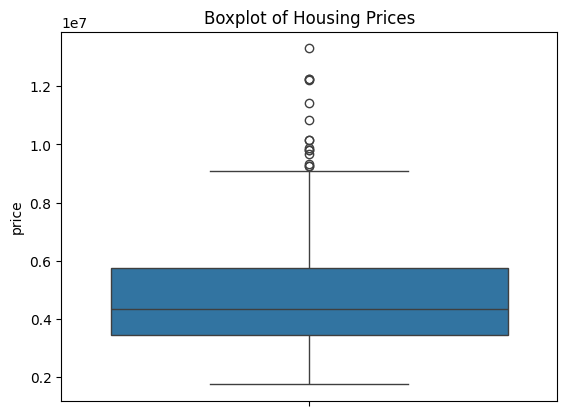

In [ ]:
# outliers

sns.boxplot(y=df['price'])
plt.title('Boxplot of Housing Prices')
plt.show()

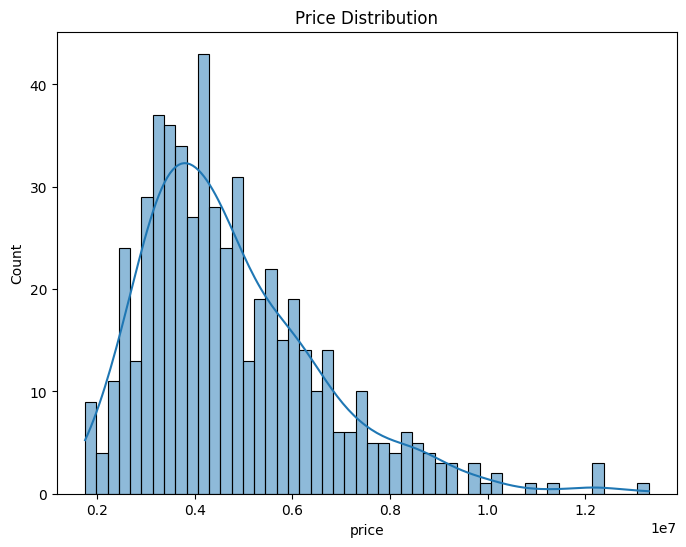

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

2. Feature Engineering

In [ ]:
encoder = LabelEncoder()
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
encoder = OneHotEncoder()
df= pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


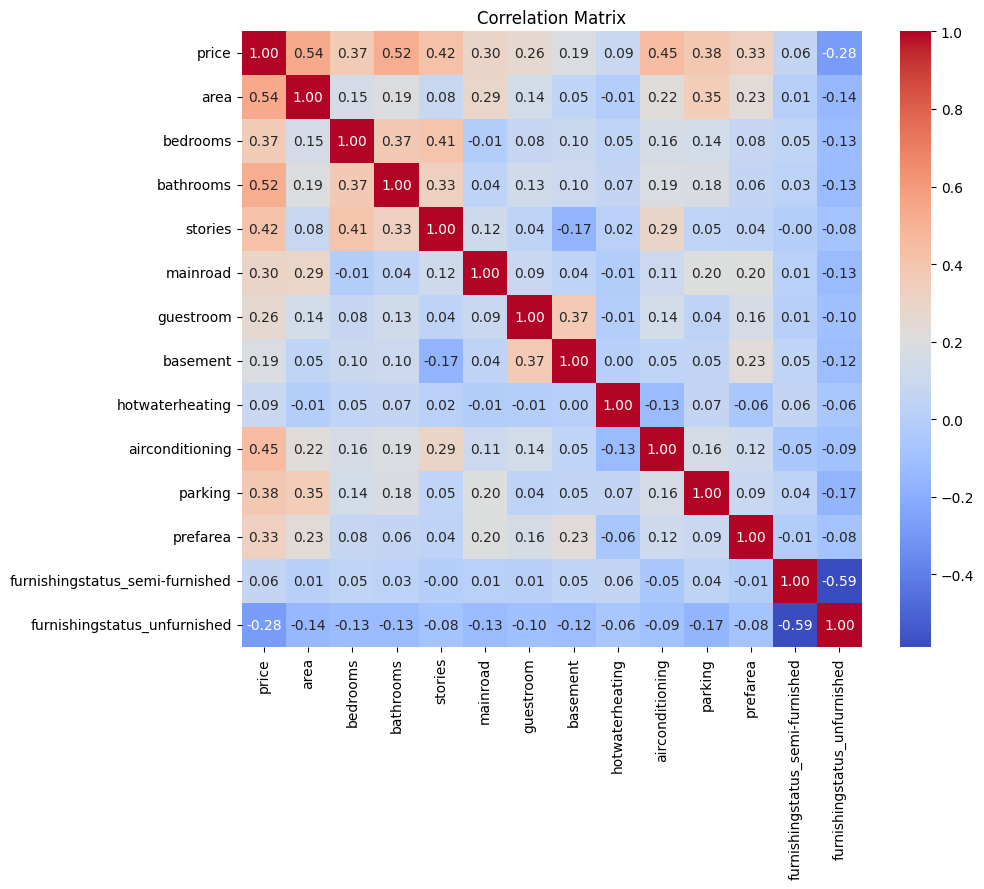

In [ ]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

 the heatmap shows that Area, Bathroom, and Air Conditioning are the features most correlated with Price

In [ ]:
top_corr = corr_matrix["price"].sort_values(ascending=False)
print("Top 3 correlated features with Price:")
print(top_corr.head(4))

Top 3 correlated features with Price:
price              1.000000
area               0.535997
bathrooms          0.517545
airconditioning    0.452954
Name: price, dtype: float64


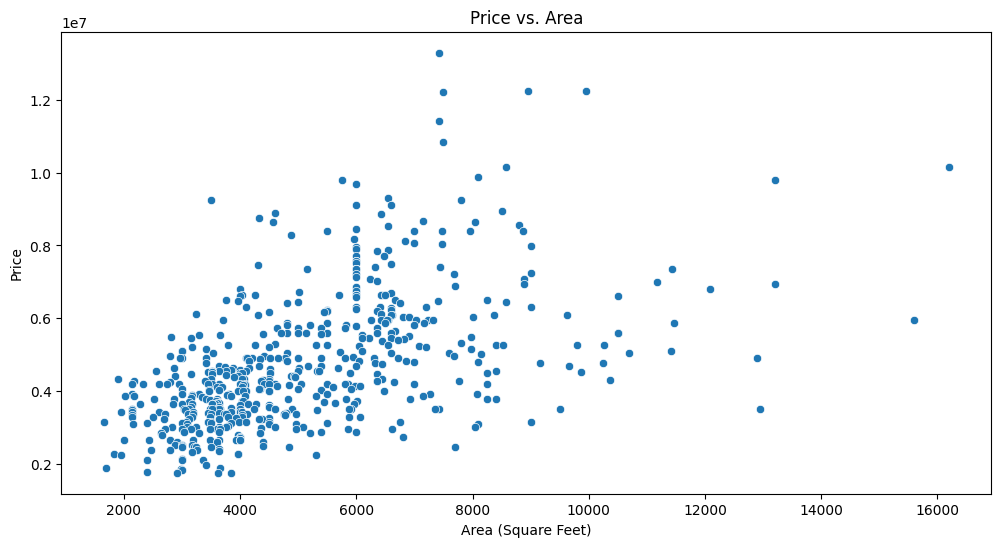

In [ ]:
# 1. Scatter plot for Price vs. Area
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Price vs. Area')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Price')
plt.show()

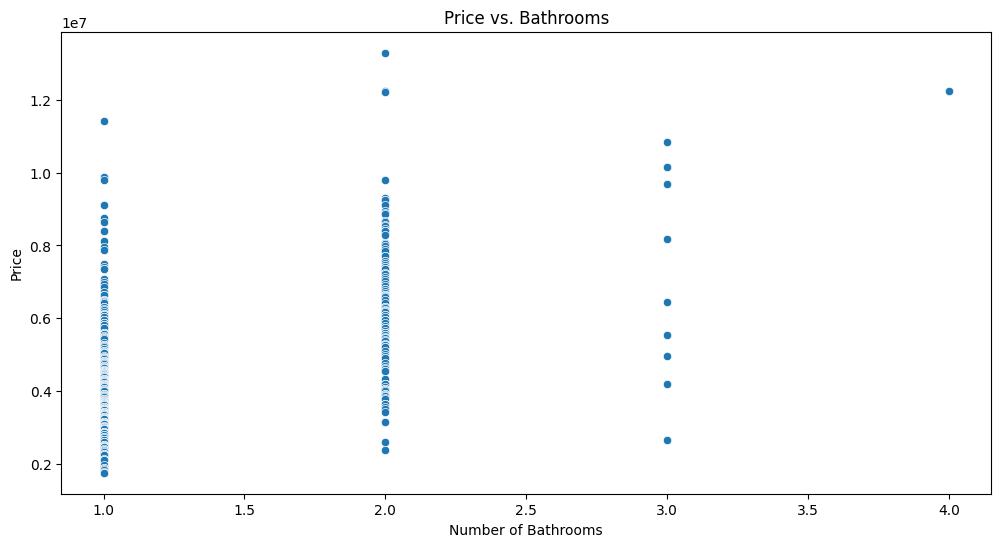

In [ ]:
#  Scatter plot for Price vs. Bathrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['bathrooms'], y=df['price'])
plt.title('Price vs. Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

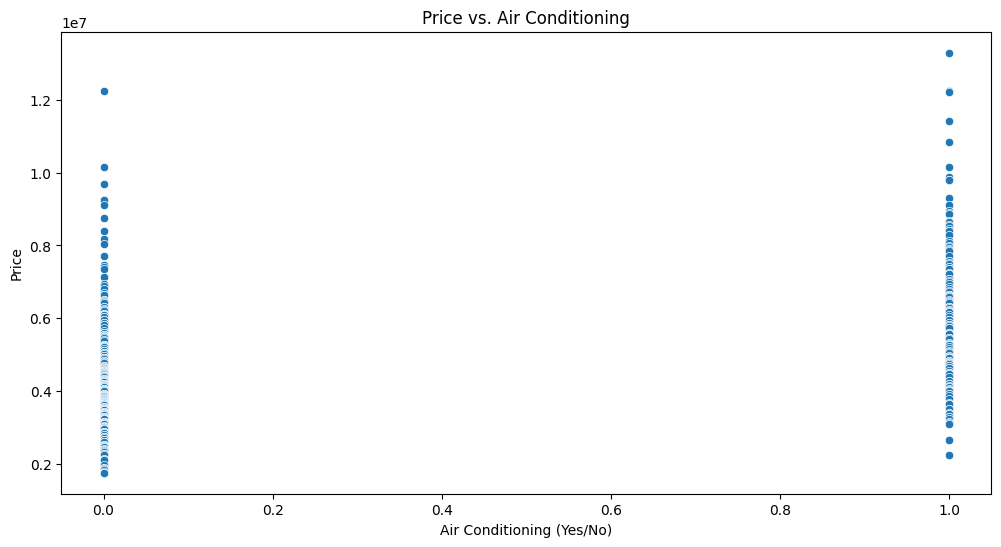

In [ ]:
#  Scatter plot for Price vs. Air Conditioning
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['airconditioning'], y=df['price'])
plt.title('Price vs. Air Conditioning')
plt.xlabel('Air Conditioning (Yes/No)')
plt.ylabel('Price')
plt.show()

3. split training set and test set

In [ ]:
X = df[['area', 'bathrooms', 'airconditioning', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. training model

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)

# model evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE: 1116944.40
MSE: 2190388099720.77
RMSE: 1479995.98
R² Score: 0.5667


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE: 1176747.38
MSE: 2482458596580.26
RMSE: 1575581.99
R² Score: 0.5089
